## Two electrons in a well

Now that's been quite a slog to get through all that theory, it'll be nice to bring the equations to life by actually running iDEA. We'll focus on the physics going on and won't worry too much about how iDEA is solving the equations under the hood.

We start by investigating the electronic ground state of two electrons sitting in a harmonic well.
Let's define our external potential $V_{ext}(r)$.

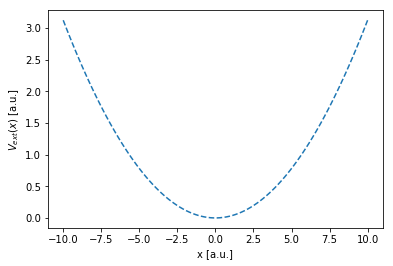

In [10]:
# Let's define our external potential
omega = 0.25   # resonance frequency in atomic units
def harmonic_well(x):
    return 1/2 * omega**2 * x**2

# and plot it
import numpy as np
x = np.linspace(-10,10,100)

import matplotlib.pyplot as plt
plt.plot(x, harmonic_well(x), '--')
plt.xlabel("x [a.u.]")
plt.ylabel(r"$V_{ext}(x)$ [a.u.]")
plt.show()

Now we'll fill $N=2$ electrons into the system and use the iDEA code to find the exact solution to the time-independent Schrödinger equation

$$\begin{equation}\left(-\frac{1}{2} \sum_i \frac{\partial^2}{\partial r_i^2} + V_{ext}(r_i) + \frac{1}{2}\sum_{i\neq j}v(r_i-r_j) \right) \Psi(r_1,r_2) = E \Psi(r_1,r_2)\end{equation}$$


In [9]:
from iDEA.input import Input
pm = Input()   # create input parameters with default settings
pm.sys.NE = 2  # we want 2 electrons
pm.sys.v_ext = harmonic_well  # pass on our external potential

print(pm.sys)  # show all system parameters

pm.run.name = "harmonic_well"
pm.run.EXT  = True     # run the exact system
pm.run.LDA  = True     # run DFT in the local density approximation
pm.run.NON  = True     # run the non-interacting approximation

print(pm.sys)  # show all run parameters

NE = 2
grid = 201
stencil = 3
xmax = 10.0
tmax = 1.0
imax = 1001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function harmonic_well at 0x10c413c80>
v_pert = <function Input.__init__.<locals>.v_pert at 0x10c474d08>
v_pert_im = <function Input.__init__.<locals>.v_pert_im at 0x10c474840>

NE = 2
grid = 201
stencil = 3
xmax = 10.0
tmax = 1.0
imax = 1001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function harmonic_well at 0x10c413c80>
v_pert = <function Input.__init__.<locals>.v_pert at 0x10c474d08>
v_pert_im = <function Input.__init__.<locals>.v_pert_im at 0x10c474840>



We're going to compute the ground state both exactly and in the non-interacting and local-density approximations. Let's go!

In [11]:
# run iDEA with specified parameters and save results
# this shouldn't take more than a minute
results = pm.execute()  

                                                              
                *    ****     *****       *                   
                     *   *    *          * *                  
                *    *    *   *         *   *                 
                *    *     *  *****    *     *                
                *    *    *   *       *********               
                *    *   *    *      *         *              
                *    ****     ***** *           *             
                                                              
  +----------------------------------------------------------+
  |          Interacting Dynamic Electrons Approach          |
  |              to Many-Body Quantum Mechanics              |
  |                                                          |
  |                      Release 2.1.0                       |
  |                                                          |
  |       Created by Piers Lillystone, James Ramsden,  

EXT: t = 54.32000, convergence = 4.225380342792668e-088[KK

EXT: t = 87.76000, convergence = 9.984040724320676e-121[K
EXT: ground-state converged
EXT: ground-state energy = 0.75310
all jobs done 



Given $\Psi(r_1,r_2)$, we can compute the corresponding density $n(r)$ - in fact, iDEA has already done it for us.

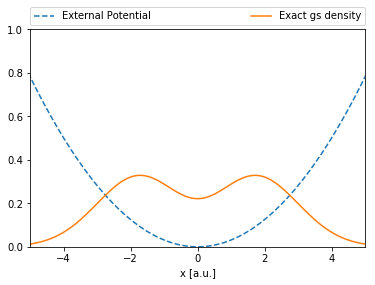

In [34]:
x = pm.space.grid
plt.plot(x,results.ext.gs_ext_vxt,'--', label = "External Potential")
plt.plot(x,results.ext.gs_ext_den, label = "Exact gs density")

plt.xlabel("x [a.u.]")
plt.xlim([-5,5])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

It turns out that for two (spinless) electrons, you get two bumps inside the well.

Let's see how the non-interacting and local-density approximations measure up against the exact solution.

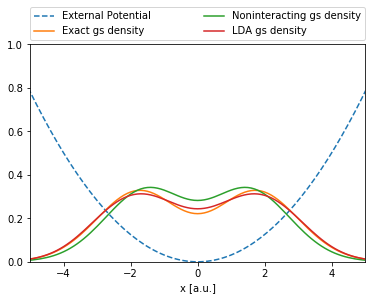

In [39]:
plt.plot(x,results.ext.gs_ext_vxt,'--', label = "External Potential")
plt.plot(x,results.ext.gs_ext_den, label = "Exact gs density")
plt.plot(x,results.non.gs_non_den, label = "Noninteracting gs density")
plt.plot(x,results.lda.gs_lda2_den, label = "LDA gs density")

plt.xlabel("x [a.u.]")
plt.xlim([-5,5])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

This plot illustrates a few things interesting things about the theory. 

Firstly we can see that the non-interacting electron approximation gets the rough shape of the potential right. However, the electron's are more likely to be found near the centre of the well since they prefer to be in regions of low potential, and don't have Coulomb interaction pushing them away from each other. 

We also see that the LDA does a very good job, almost perfectly recovering the exact case. 

Now, in Kohn-Sham density functional theory, the task is to find the Kohn-Sham potential $V_{KS}(r)$ such that the solution of the Kohn-Sham equations

$$\begin{equation} \left(-\frac{1}{2} \frac{\partial^2}{\partial r^2}+V_{KS}(r)\right) \psi_i(r) = i \frac{\partial}{\partial t} \psi_i(r)
\end{equation}$$

yields the same density. Since we already know the exact $n(r)$, the task reduces to an optimisation problem. Try to optimize the Kohn-Sham potential to bring $n_{KS}(r)$ as close as possible to $n(r)$. (TODO: provide code)
